In [ ]:
import pandas as pd
df = pd.read_csv('/content/Updated_Student_Dataset_500.csv')
print(df.head())

          NIM  Age  Gender EconomicStatus   JobStatus   Address  EarlyGPA  \
0  20240001.0   25  Female       Moderate  Unemployed  Suburban      3.08   
1  20240002.0   24    Male            Low  Unemployed     Urban      3.00   
2  20240003.0   22  Female            NaN   Part-time  Suburban      2.45   
3  20240004.0   24    Male       Moderate   Part-time     Urban      3.21   
4  20240005.0   24  Female           High  Unemployed     Urban       NaN   

    GPA  CreditsTaken  SemesterCount  ...  AttendancePercentage  \
0  3.73         128.0              8  ...                  90.0   
1  3.93          84.0              6  ...                  89.0   
2  3.32         134.0              8  ...                  98.0   
3  2.49         107.0              7  ...                  70.0   
4  2.13         148.0              9  ...                  87.0   

   ExtraCurricularActivity RepeatingCourses  AcademicMotivation FamilySupport  \
0                 Inactive              2.0          

In [ ]:
print(df.isnull().sum())

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print(df.dtypes)


NIM                         1
Age                         0
Gender                      4
EconomicStatus              5
JobStatus                  11
Address                     5
EarlyGPA                    3
GPA                         4
CreditsTaken                3
SemesterCount               0
KeyCoursesGrades            1
AttendancePercentage        1
ExtraCurricularActivity     7
RepeatingCourses            6
AcademicMotivation          2
FamilySupport               0
AcademicGuidance            7
StressLevel                 1
FinancialSupport            4
CampusFacilitiesAccess      0
GraduationStatus            3
dtype: int64
NIM                        float64
Age                          int64
Gender                      object
EconomicStatus              object
JobStatus                   object
Address                     object
EarlyGPA                   float64
GPA                        float64
CreditsTaken               float64
SemesterCount                int64
KeyCour

In [ ]:
df = df.fillna(df.median(numeric_only=True))
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)

print(df.isnull().sum())


NIM                        0
Age                        0
Gender                     0
EconomicStatus             0
JobStatus                  0
Address                    0
EarlyGPA                   0
GPA                        0
CreditsTaken               0
SemesterCount              0
KeyCoursesGrades           0
AttendancePercentage       0
ExtraCurricularActivity    0
RepeatingCourses           0
AcademicMotivation         0
FamilySupport              0
AcademicGuidance           0
StressLevel                0
FinancialSupport           0
CampusFacilitiesAccess     0
GraduationStatus           0
dtype: int64


In [ ]:
df['Gender'] = df['Gender'].str.lower().replace({'m': 'male', 'f': 'female'})
df['EconomicStatus'] = df['EconomicStatus'].str.capitalize()

print(df.head())


          NIM  Age  Gender EconomicStatus   JobStatus   Address  EarlyGPA  \
0  20240001.0   25  female       Moderate  Unemployed  Suburban      3.08   
1  20240002.0   24    male            Low  Unemployed     Urban      3.00   
2  20240003.0   22  female           High   Part-time  Suburban      2.45   
3  20240004.0   24    male       Moderate   Part-time     Urban      3.21   
4  20240005.0   24  female           High  Unemployed     Urban      3.02   

    GPA  CreditsTaken  SemesterCount  ...  AttendancePercentage  \
0  3.73         128.0              8  ...                  90.0   
1  3.93          84.0              6  ...                  89.0   
2  3.32         134.0              8  ...                  98.0   
3  2.49         107.0              7  ...                  70.0   
4  2.13         148.0              9  ...                  87.0   

   ExtraCurricularActivity RepeatingCourses  AcademicMotivation FamilySupport  \
0                 Inactive              2.0          

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())


0
0


In [ ]:
df = df.drop(columns=['NIM','Address','EarlyGPA'])
print(df.columns)

Index(['Age', 'Gender', 'EconomicStatus', 'JobStatus', 'GPA', 'CreditsTaken',
       'SemesterCount', 'KeyCoursesGrades', 'AttendancePercentage',
       'ExtraCurricularActivity', 'RepeatingCourses', 'AcademicMotivation',
       'FamilySupport', 'AcademicGuidance', 'StressLevel', 'FinancialSupport',
       'CampusFacilitiesAccess', 'GraduationStatus'],
      dtype='object')


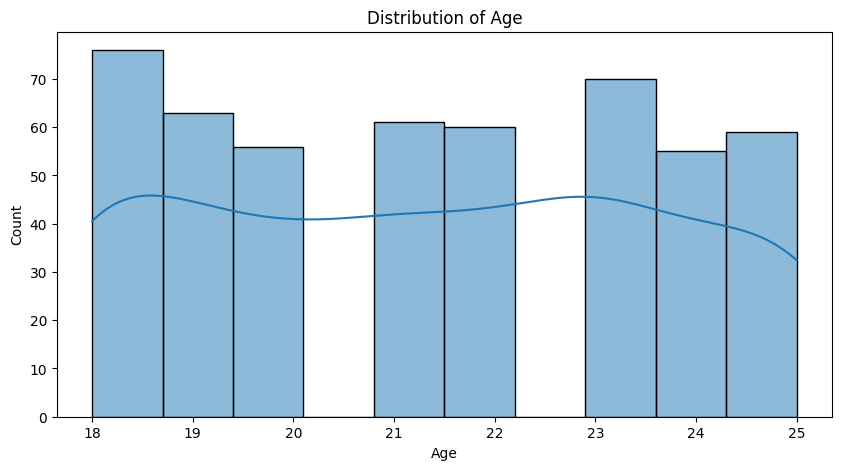

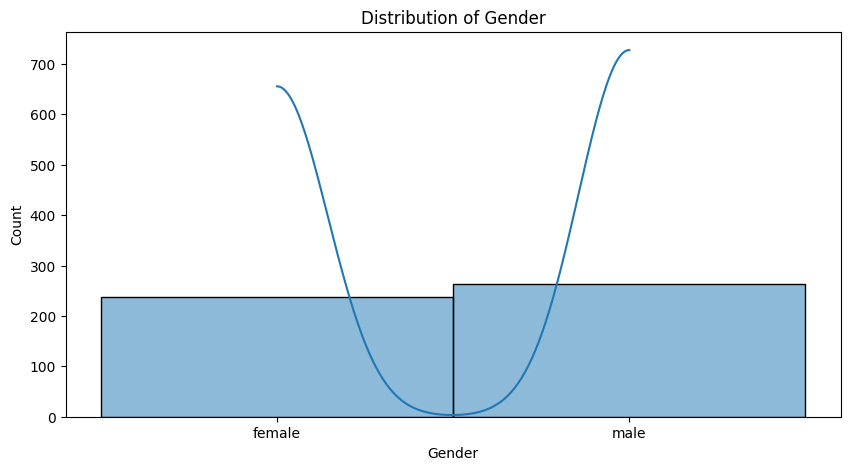

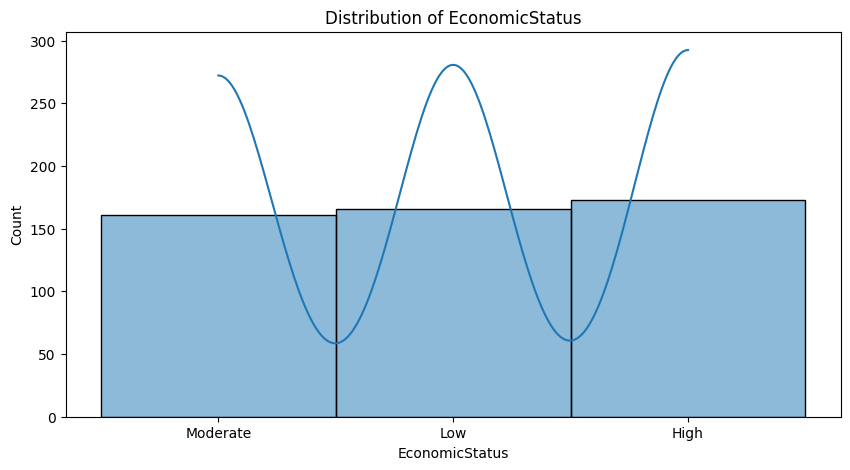

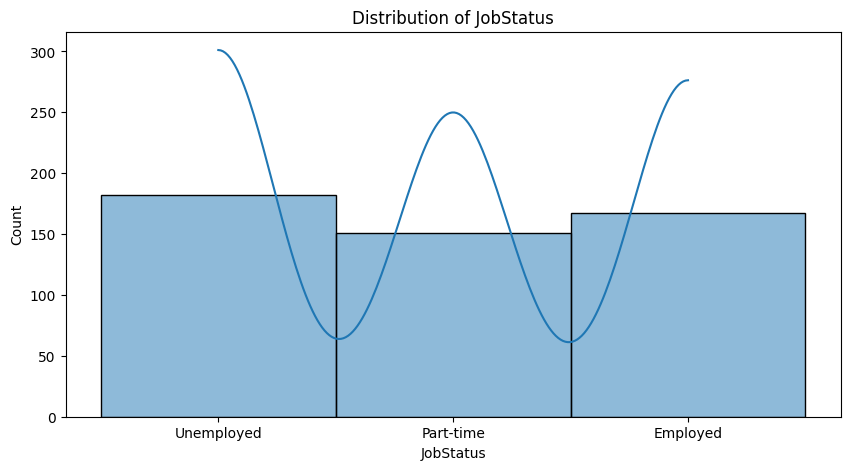

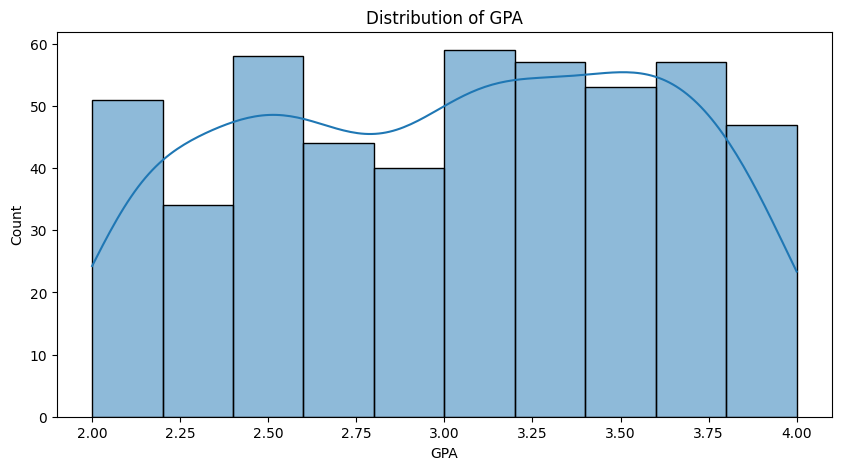

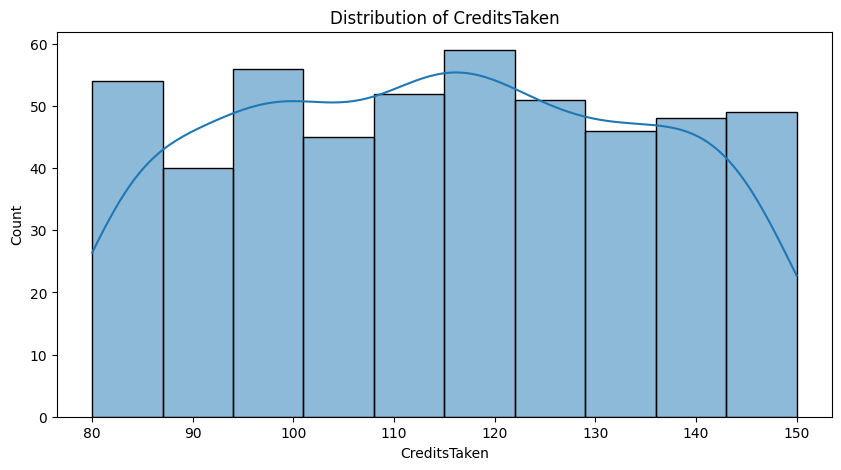

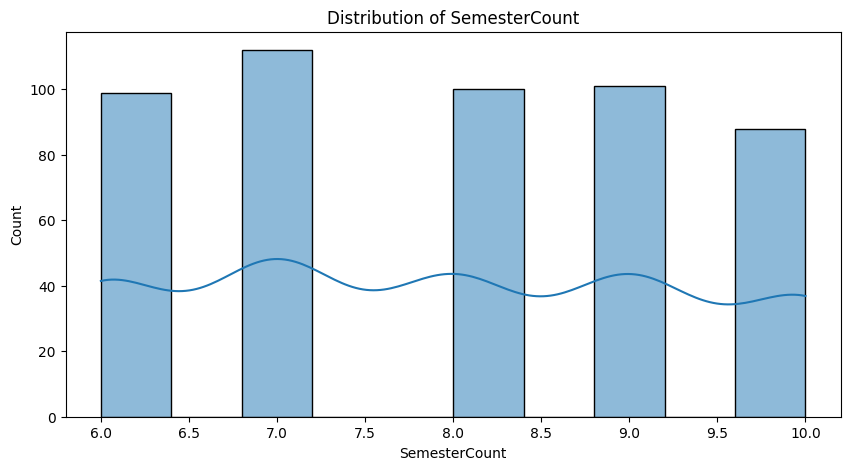

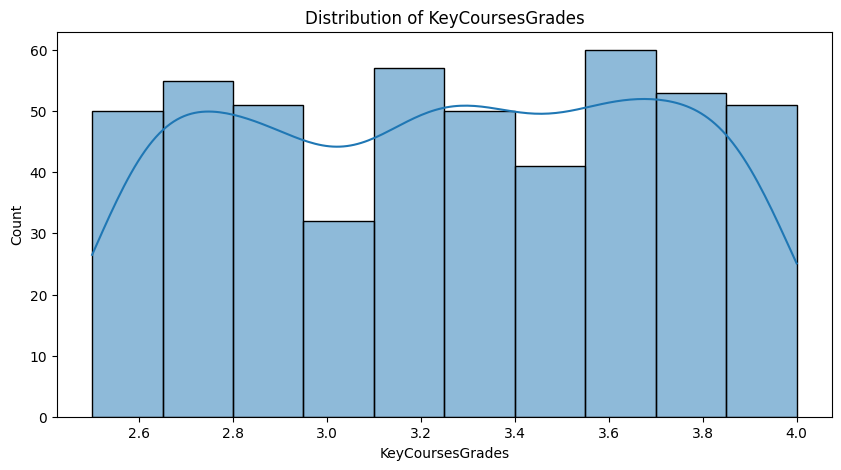

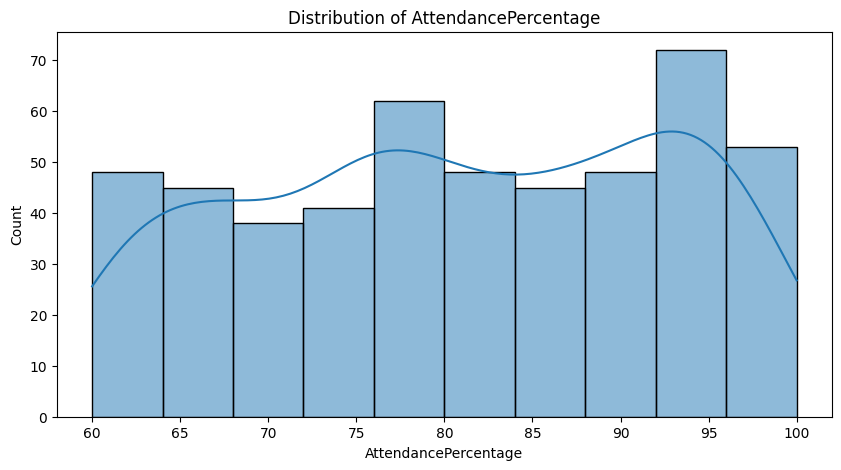

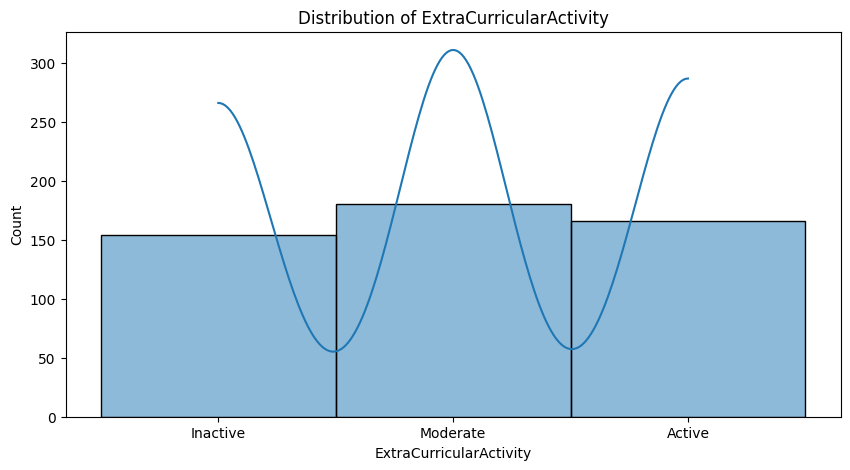

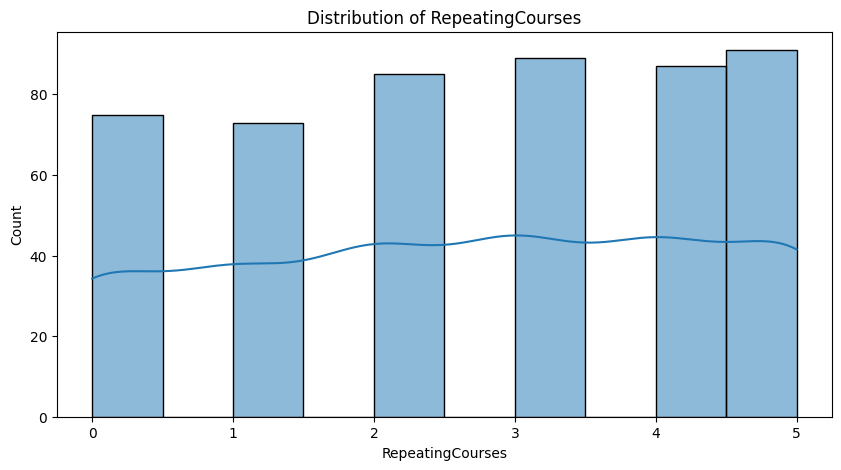

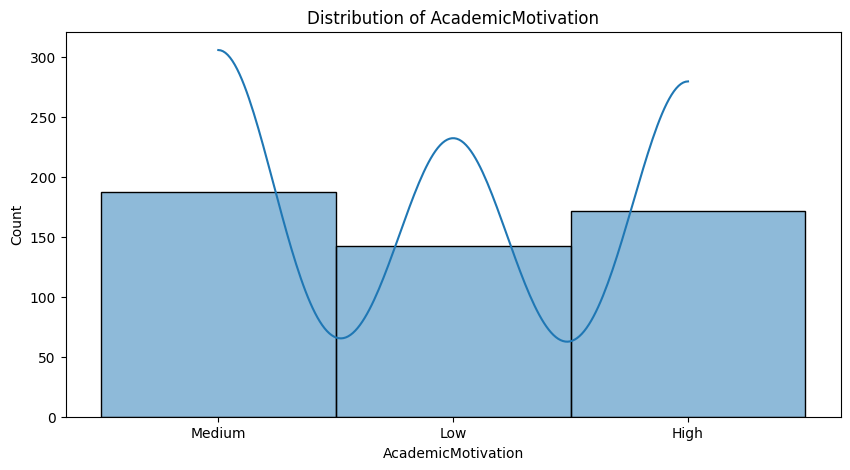

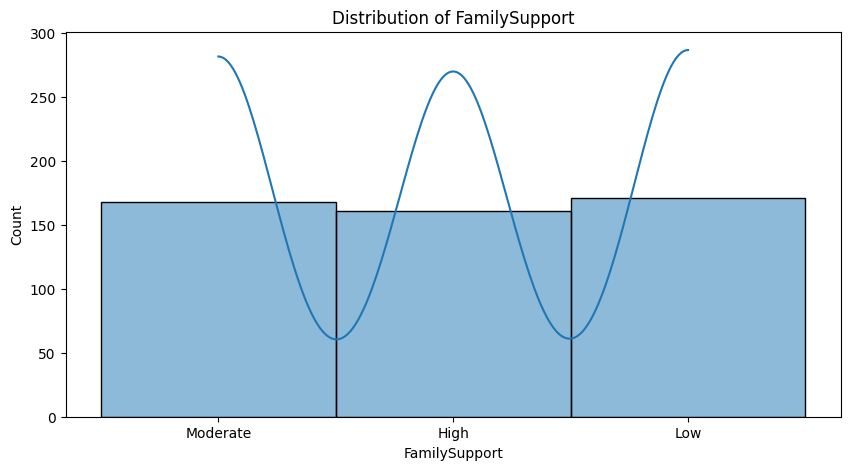

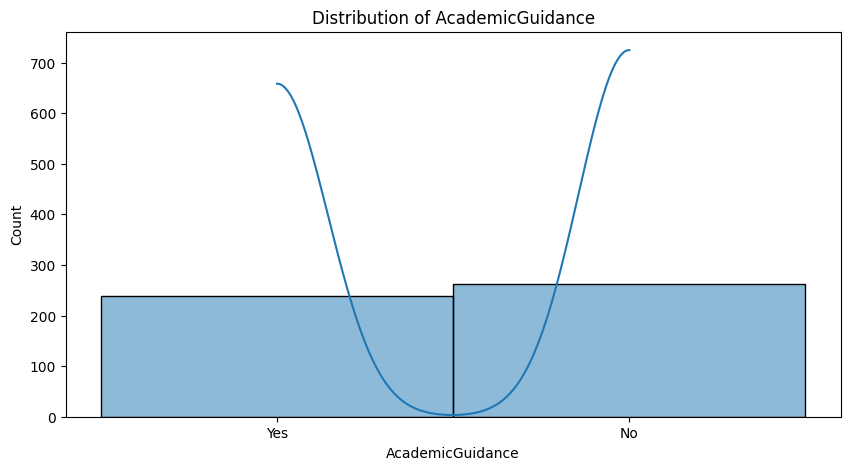

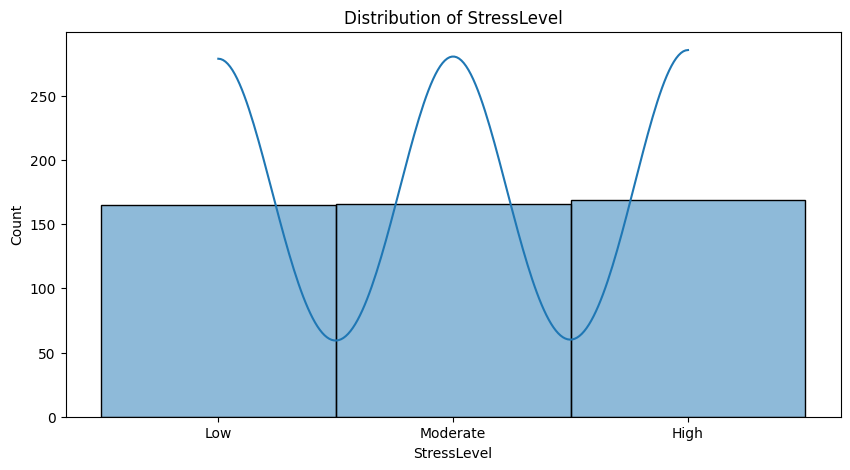

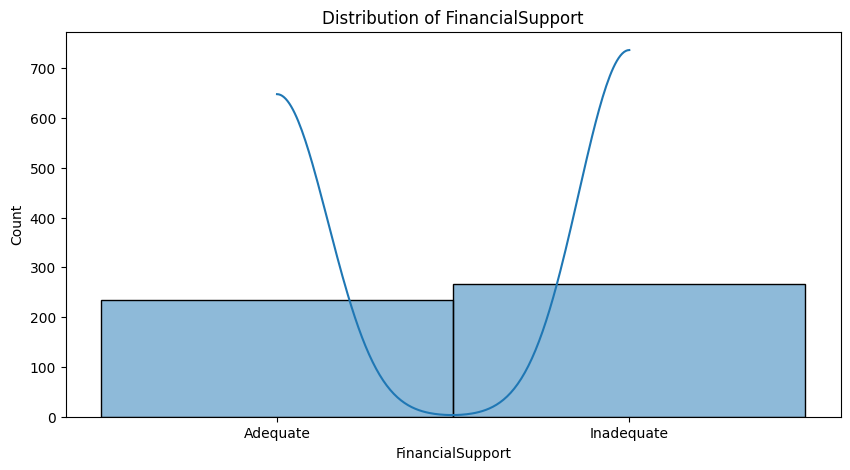

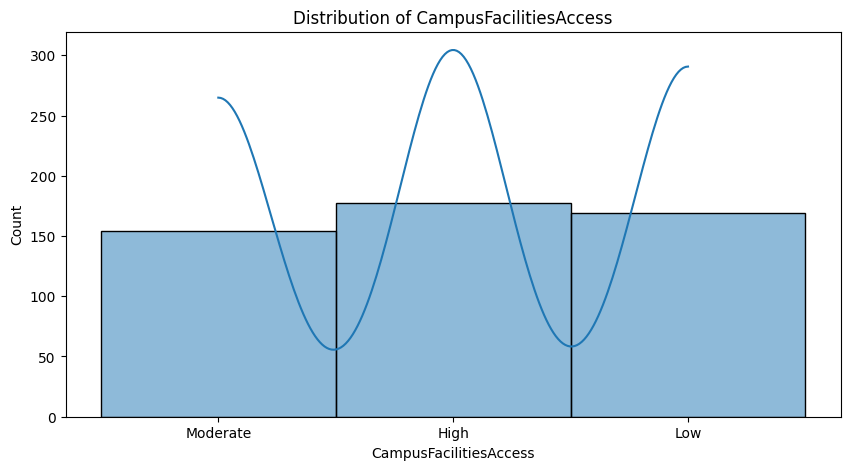

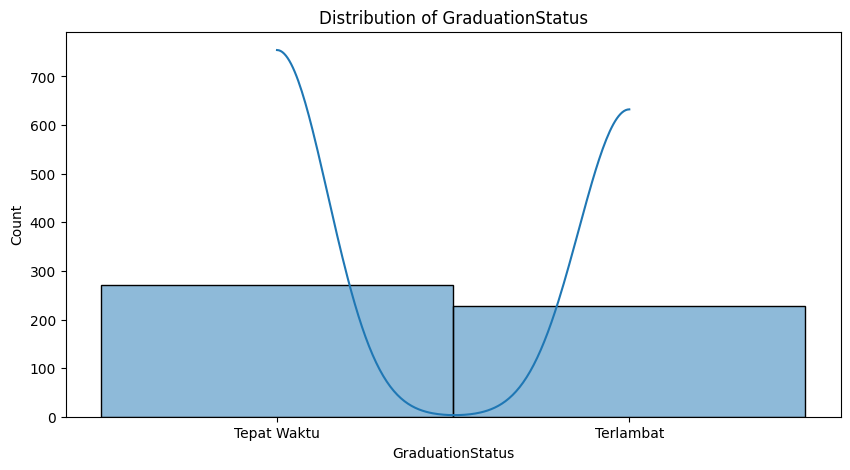

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan histplot untuk setiap fitur
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['Gender', 'EconomicStatus', 'JobStatus', 'ExtraCurricularActivity',
                        'RepeatingCourses', 'AcademicMotivation', 'FamilySupport', 'AcademicGuidance',
                        'FinancialSupport', 'CampusFacilitiesAccess', 'GraduationStatus','StressLevel']

encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

print(df.head())


   Age  Gender  EconomicStatus  JobStatus   GPA  CreditsTaken  SemesterCount  \
0   25     0.0             2.0        2.0  3.73         128.0              8   
1   24     1.0             1.0        2.0  3.93          84.0              6   
2   22     0.0             0.0        1.0  3.32         134.0              8   
3   24     1.0             2.0        1.0  2.49         107.0              7   
4   24     0.0             0.0        2.0  2.13         148.0              9   

   KeyCoursesGrades  AttendancePercentage  ExtraCurricularActivity  \
0              3.97                  90.0                      1.0   
1              3.91                  89.0                      2.0   
2              3.53                  98.0                      1.0   
3              2.73                  70.0                      2.0   
4              3.57                  87.0                      2.0   

   RepeatingCourses  AcademicMotivation  FamilySupport  AcademicGuidance  \
0               2.0   

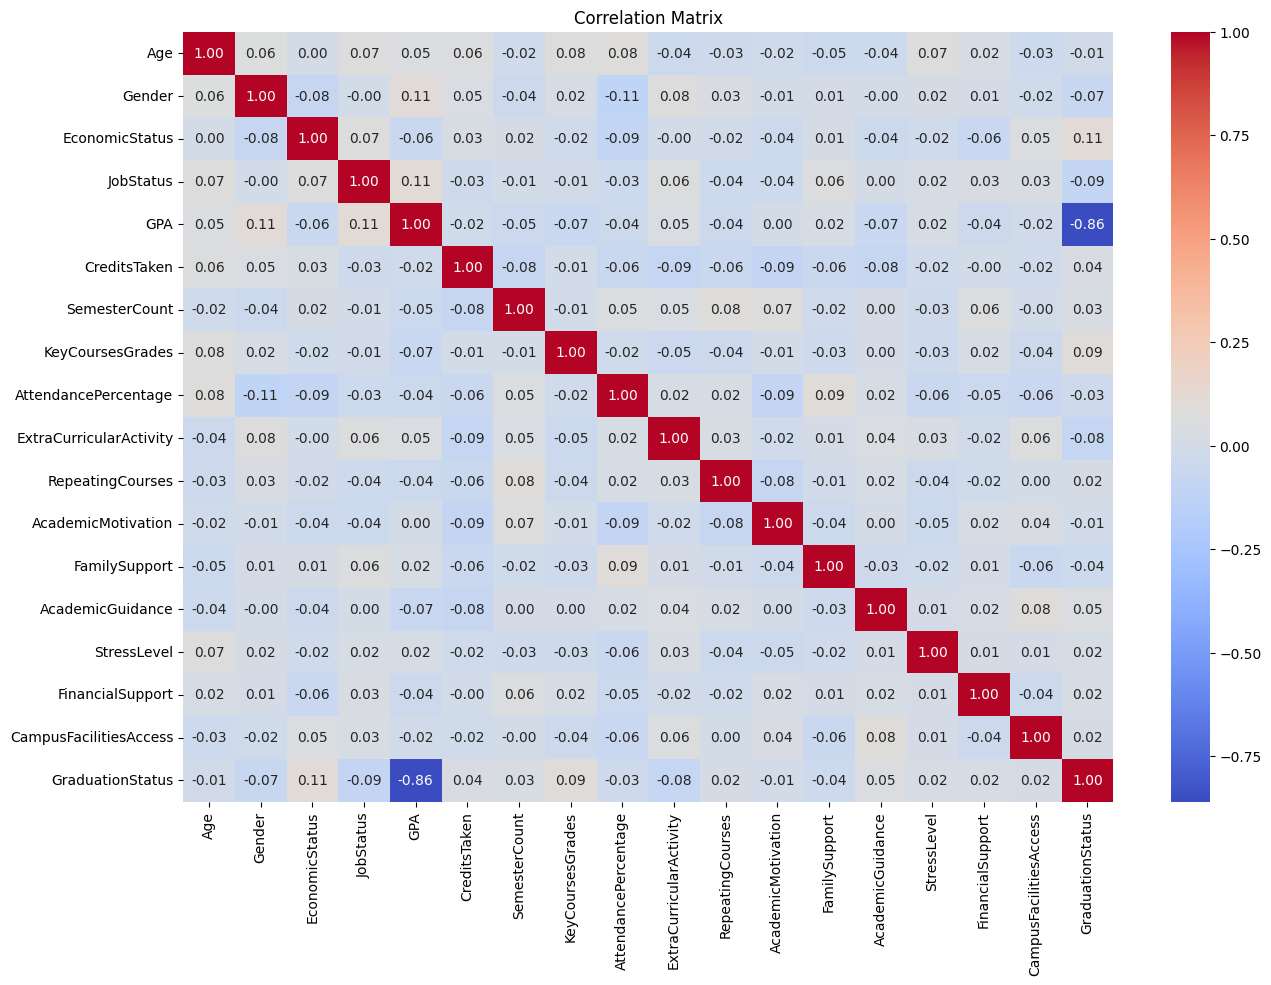

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop('GraduationStatus', axis=1)
y = df['GraduationStatus']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Inisialisasi model
lr = LogisticRegression()

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 100, 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Prediksi pada data test
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')


Confusion Matrix:
[[50  2]
 [ 2 46]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        52
         1.0       0.96      0.96      0.96        48

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Akurasi: 0.96


In [ ]:
import pickle
with open('graduation_prediction_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)